In [1]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np 
import twoSig_comp as ts
import sklearn as sk
import data_utils as du

In [119]:
reload(ts)
ss = ts.TwoSig(fn='/Users/leiyao/data/kaggle_2sig/train_small.h5')
df = ss._df

In [120]:
df['y2'] = df.groupby('id')['y'].transform(lambda x: x.isnull())

In [121]:
df

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y,yc,y2
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,NaN,NaN,-0.414776,NaN,NaN,-2.000000e+00,NaN,-0.011753,-0.011753,0.0
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,NaN,NaN,-0.273607,NaN,NaN,-2.000000e+00,NaN,-0.001240,-0.001240,0.0
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,NaN,NaN,-0.175710,NaN,NaN,-2.000000e+00,NaN,-0.020940,-0.020940,0.0
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,NaN,NaN,-0.211506,NaN,NaN,-2.000000e+00,NaN,-0.015959,-0.015959,0.0
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,NaN,NaN,-0.001957,NaN,NaN,0.000000e+00,NaN,-0.007338,-0.007338,0.0
5,27,0,0.346856,0.166239,-6.080701,-0.992249,-0.125916,0.345812,NaN,-0.584239,...,NaN,NaN,-0.001957,NaN,NaN,-2.000000e+00,NaN,0.031425,0.031425,0.0
6,31,0,0.072036,0.014931,NaN,0.014063,NaN,-0.193205,NaN,NaN,...,NaN,NaN,0.350685,NaN,NaN,-2.000000e+00,NaN,-0.032895,-0.032895,0.0
7,38,0,0.300062,0.071251,-0.074451,-0.065292,-0.011286,0.026365,0.210249,0.167494,...,NaN,NaN,-0.168077,NaN,NaN,-2.000000e+00,NaN,0.015803,0.015803,0.0
8,39,0,-0.003511,-0.034270,0.082372,-0.023937,-0.025750,0.007815,0.263451,-0.241212,...,NaN,NaN,-0.300842,NaN,NaN,-2.000000e+00,NaN,-0.027593,-0.027593,0.0
9,40,0,-0.083330,0.081935,-2.048438,-0.206856,-0.839563,-0.234100,-0.291853,-5.722336,...,NaN,NaN,-0.386579,NaN,NaN,-2.000000e+00,NaN,0.006662,0.006662,0.0


In [69]:
ff = df[df.id==11].set_index('timestamp')
to_drop =  []
for cc in ff: 
    if ff[cc].count() < 50: to_drop.append(cc)
ff.drop(to_drop, axis=1, inplace=True)

In [88]:
pd.ols(x = ff[ss._feat_d], y = ff['y'])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <derived_0> + <derived_1> + <derived_2> + <derived_3> + <derived_4>
             + <intercept>

Number of Observations:         501
Number of Degrees of Freedom:   6

R-squared:         0.0053
Adj R-squared:    -0.0048

Rmse:              0.0163

F-stat (5, 495):     0.5239, p-value:     0.7583

Degrees of Freedom: model 5, resid 495

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     derived_0     0.0006     0.0357       0.02     0.9876    -0.0695     0.0706
     derived_1    -0.0220     0.1480      -0.15     0.8820    -0.3120     0.2680
     derived_2    -0.0006     0.0023      -0.27     0.7906    -0.0050     0.0038
     derived_3    -0.0229     0.0261      -0.88     0.3810    -0.0741     0.0283


In [89]:
pd.ols(x = ff[ss._feat_t], y = ff['y'])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <technical_0> + <technical_1> + <technical_2> + <technical_3>
             + <technical_5> + <technical_6> + <technical_7> + <technical_9>
             + <technical_10> + <technical_11> + <technical_12> + <technical_13>
             + <technical_14> + <technical_16> + <technical_17> + <technical_18>
             + <technical_19> + <technical_20> + <technical_21> + <technical_22>
             + <technical_24> + <technical_25> + <technical_27> + <technical_28>
             + <technical_29> + <technical_30> + <technical_31> + <technical_32>
             + <technical_33> + <technical_34> + <technical_35> + <technical_36>
             + <technical_37> + <technical_38> + <technical_39> + <technical_40>
             + <technical_41> + <technical_42> + <technical_43> + <technical_44>
             + <intercept>

Number of Observations:         316
Number of Degrees of Freedom:   37

R-squared:       

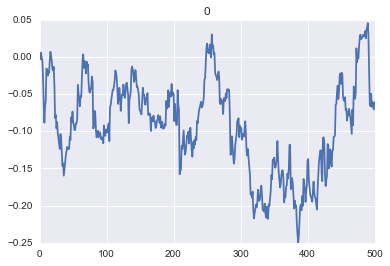

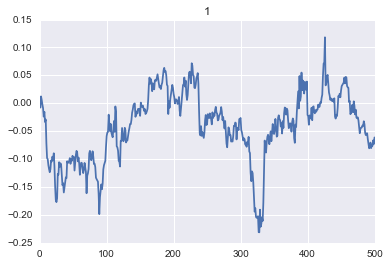

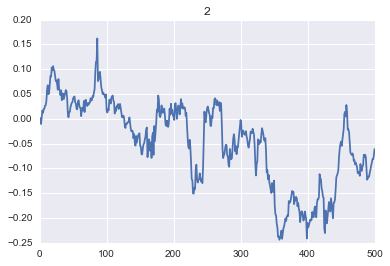

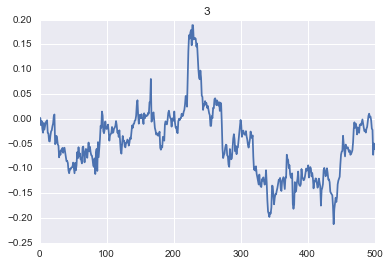

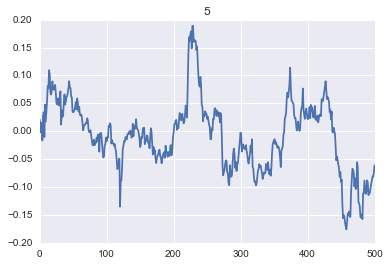

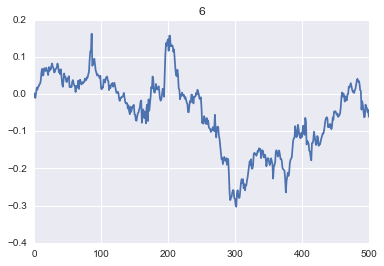

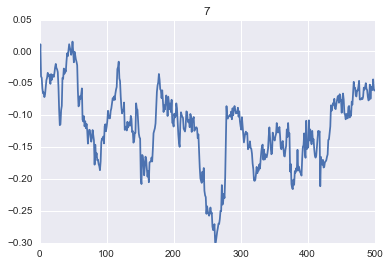

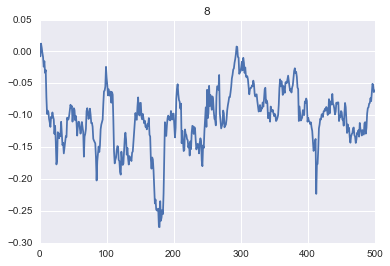

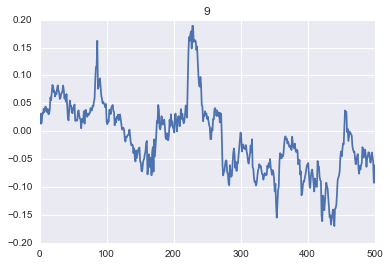

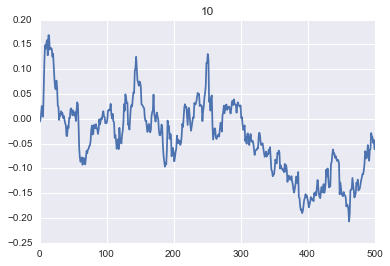

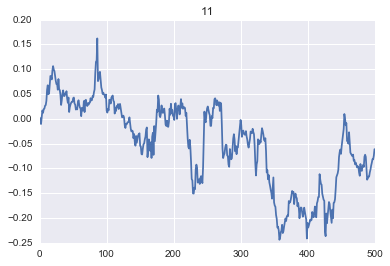

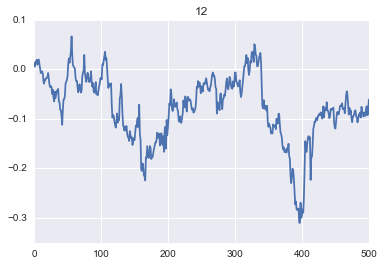

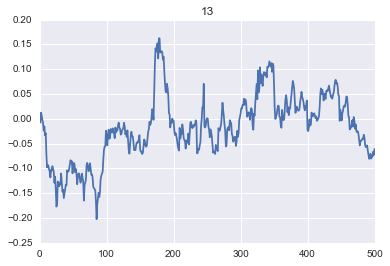

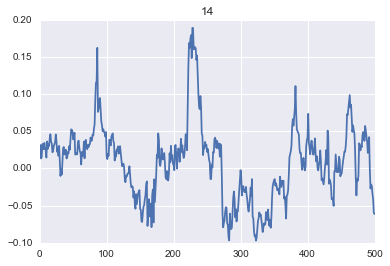

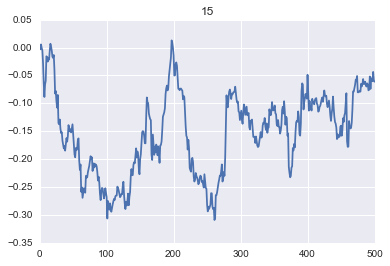

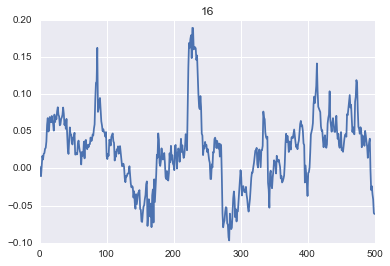

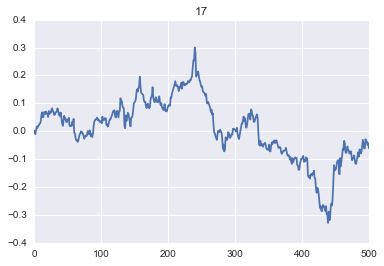

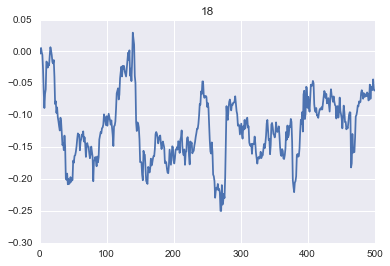

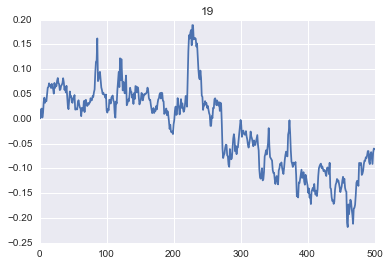

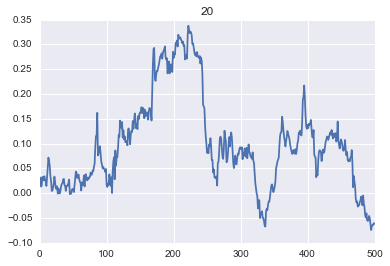

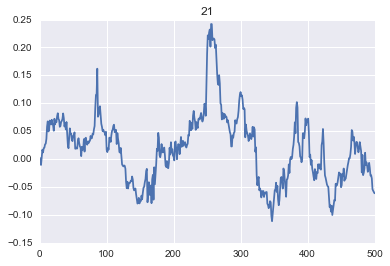

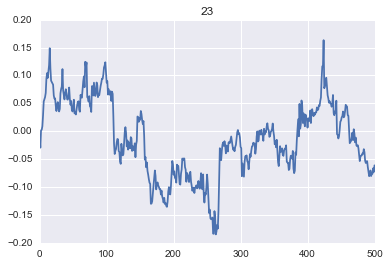

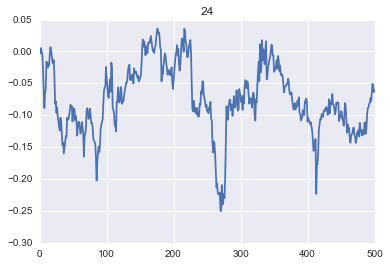

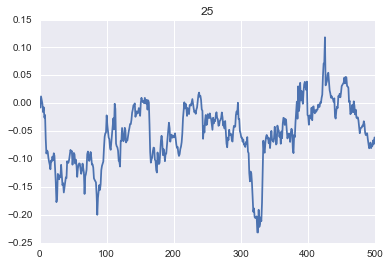

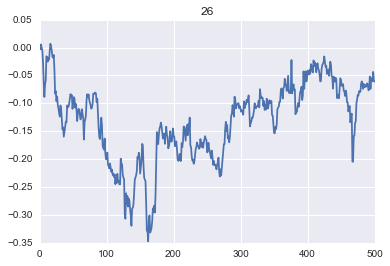

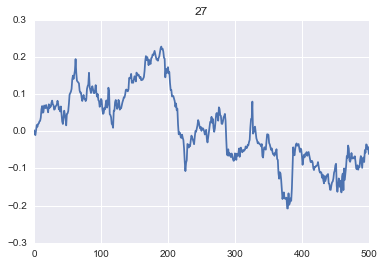

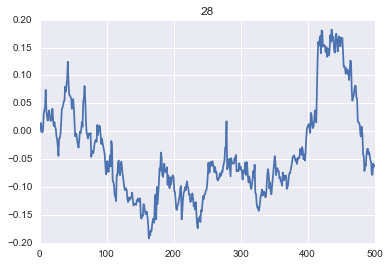

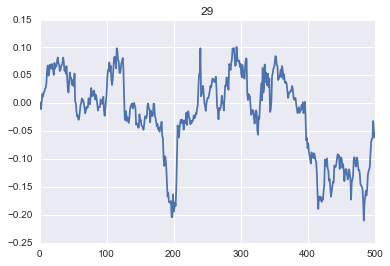

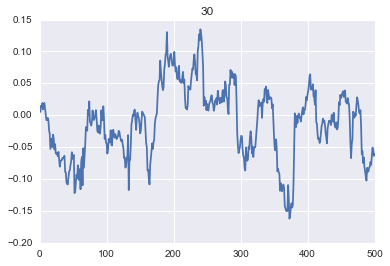

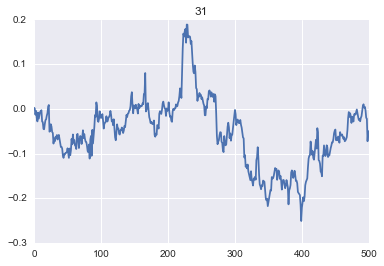

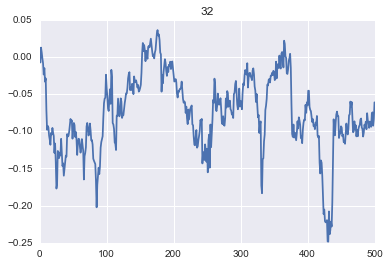

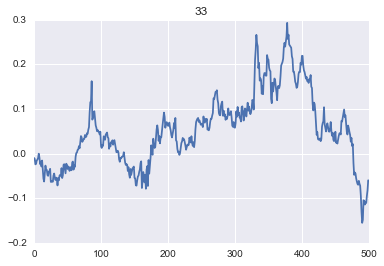

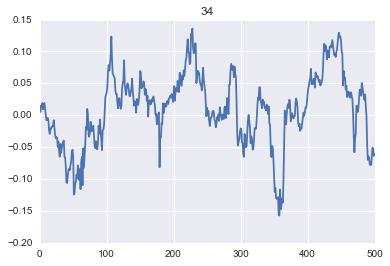

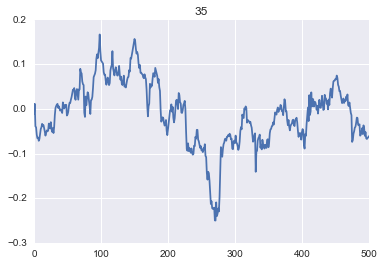

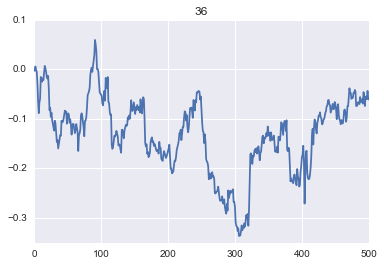

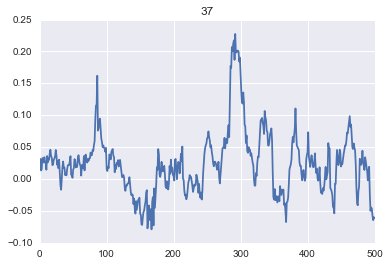

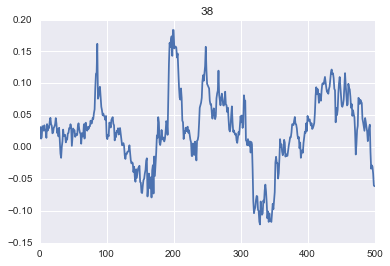

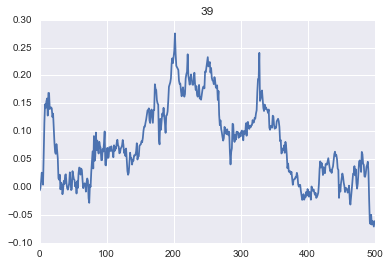

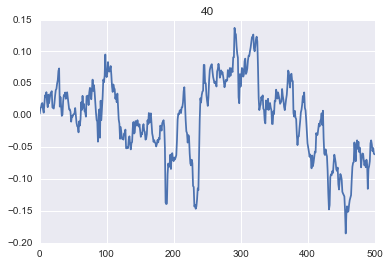

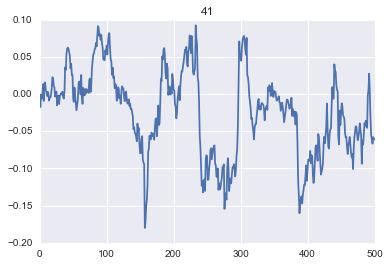

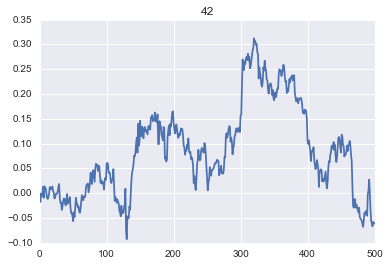

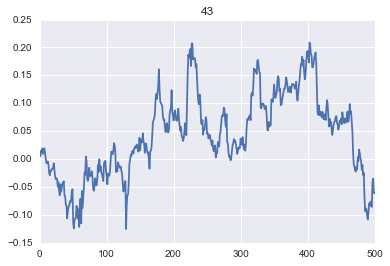

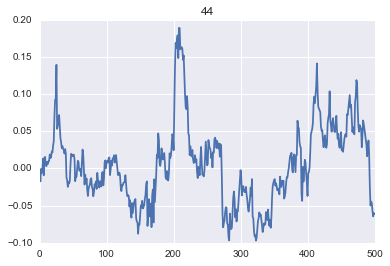

In [113]:
for i in range(45):
    key = 'fundamental_%d'%i
    if key not in ff:
        continue
    plt.figure()
    du.carol(ff, key, 'y')
    plt.title(i)